In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#Magic Function do Jupyter para visualizar figuras matplotlib sem precisar chamar plt.show()

In [4]:
tips = sns.load_dataset('tips')

Seaborn é uma biblioteca de visualização construída em cima do matplotlib, que é uma biblioteca de visualização para Python inspirada pelo MATLAB

https://seaborn.pydata.org/

https://matplotlib.org/

Por mais que Seaborn seja uma biblioteca de visualização, vamos usar ela também para importar a base de dados "tips", que representa dados de um restaurante.

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


Temos 5 colunas categóricas (time, day, smoker, sex e size)

Por mais que size contenha dados numéricos, ainda é uma categoria do tamanho da mesa.

E tenho duas colunas de dados quantitativos (total_bill e tip).

## Distribution Plots

/home/fernando/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


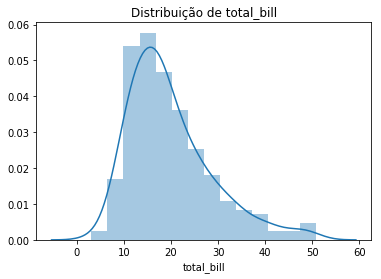

In [8]:
#distplot
plt.title('Distribuição de total_bill')

sns.distplot(tips['total_bill'])

/home/fernando/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


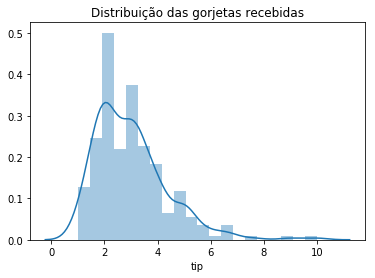

In [11]:
plt.title('Distribuição das gorjetas recebidas')

sns.distplot(tips['tip'], bins=20)

/home/fernando/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/fernando/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


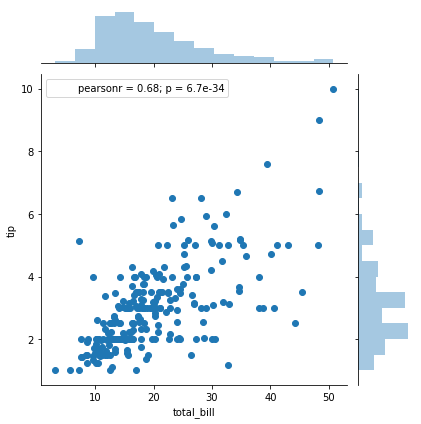

In [12]:
sns.jointplot('total_bill','tip', data=tips)

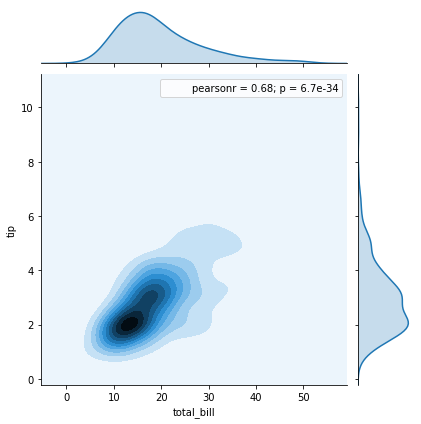

In [14]:
sns.jointplot('total_bill','tip', data=tips, kind='kde')

/home/fernando/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/fernando/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


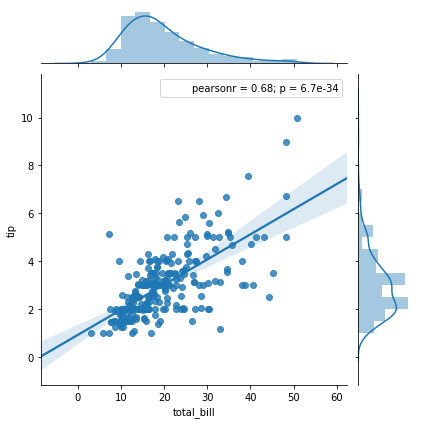

In [31]:
sns.jointplot('total_bill','tip', data=tips, kind='reg')
#Note que já faz uma regressão linear, o erro é representado pela "sombra" contornando a reta.

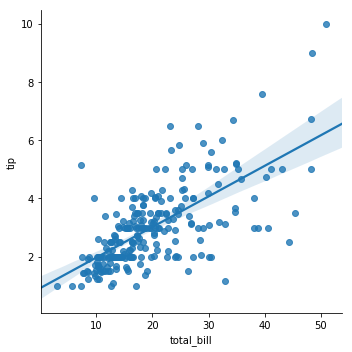

In [32]:
sns.lmplot('total_bill','tip',data=tips)

Text(0,0.5,'Conta')

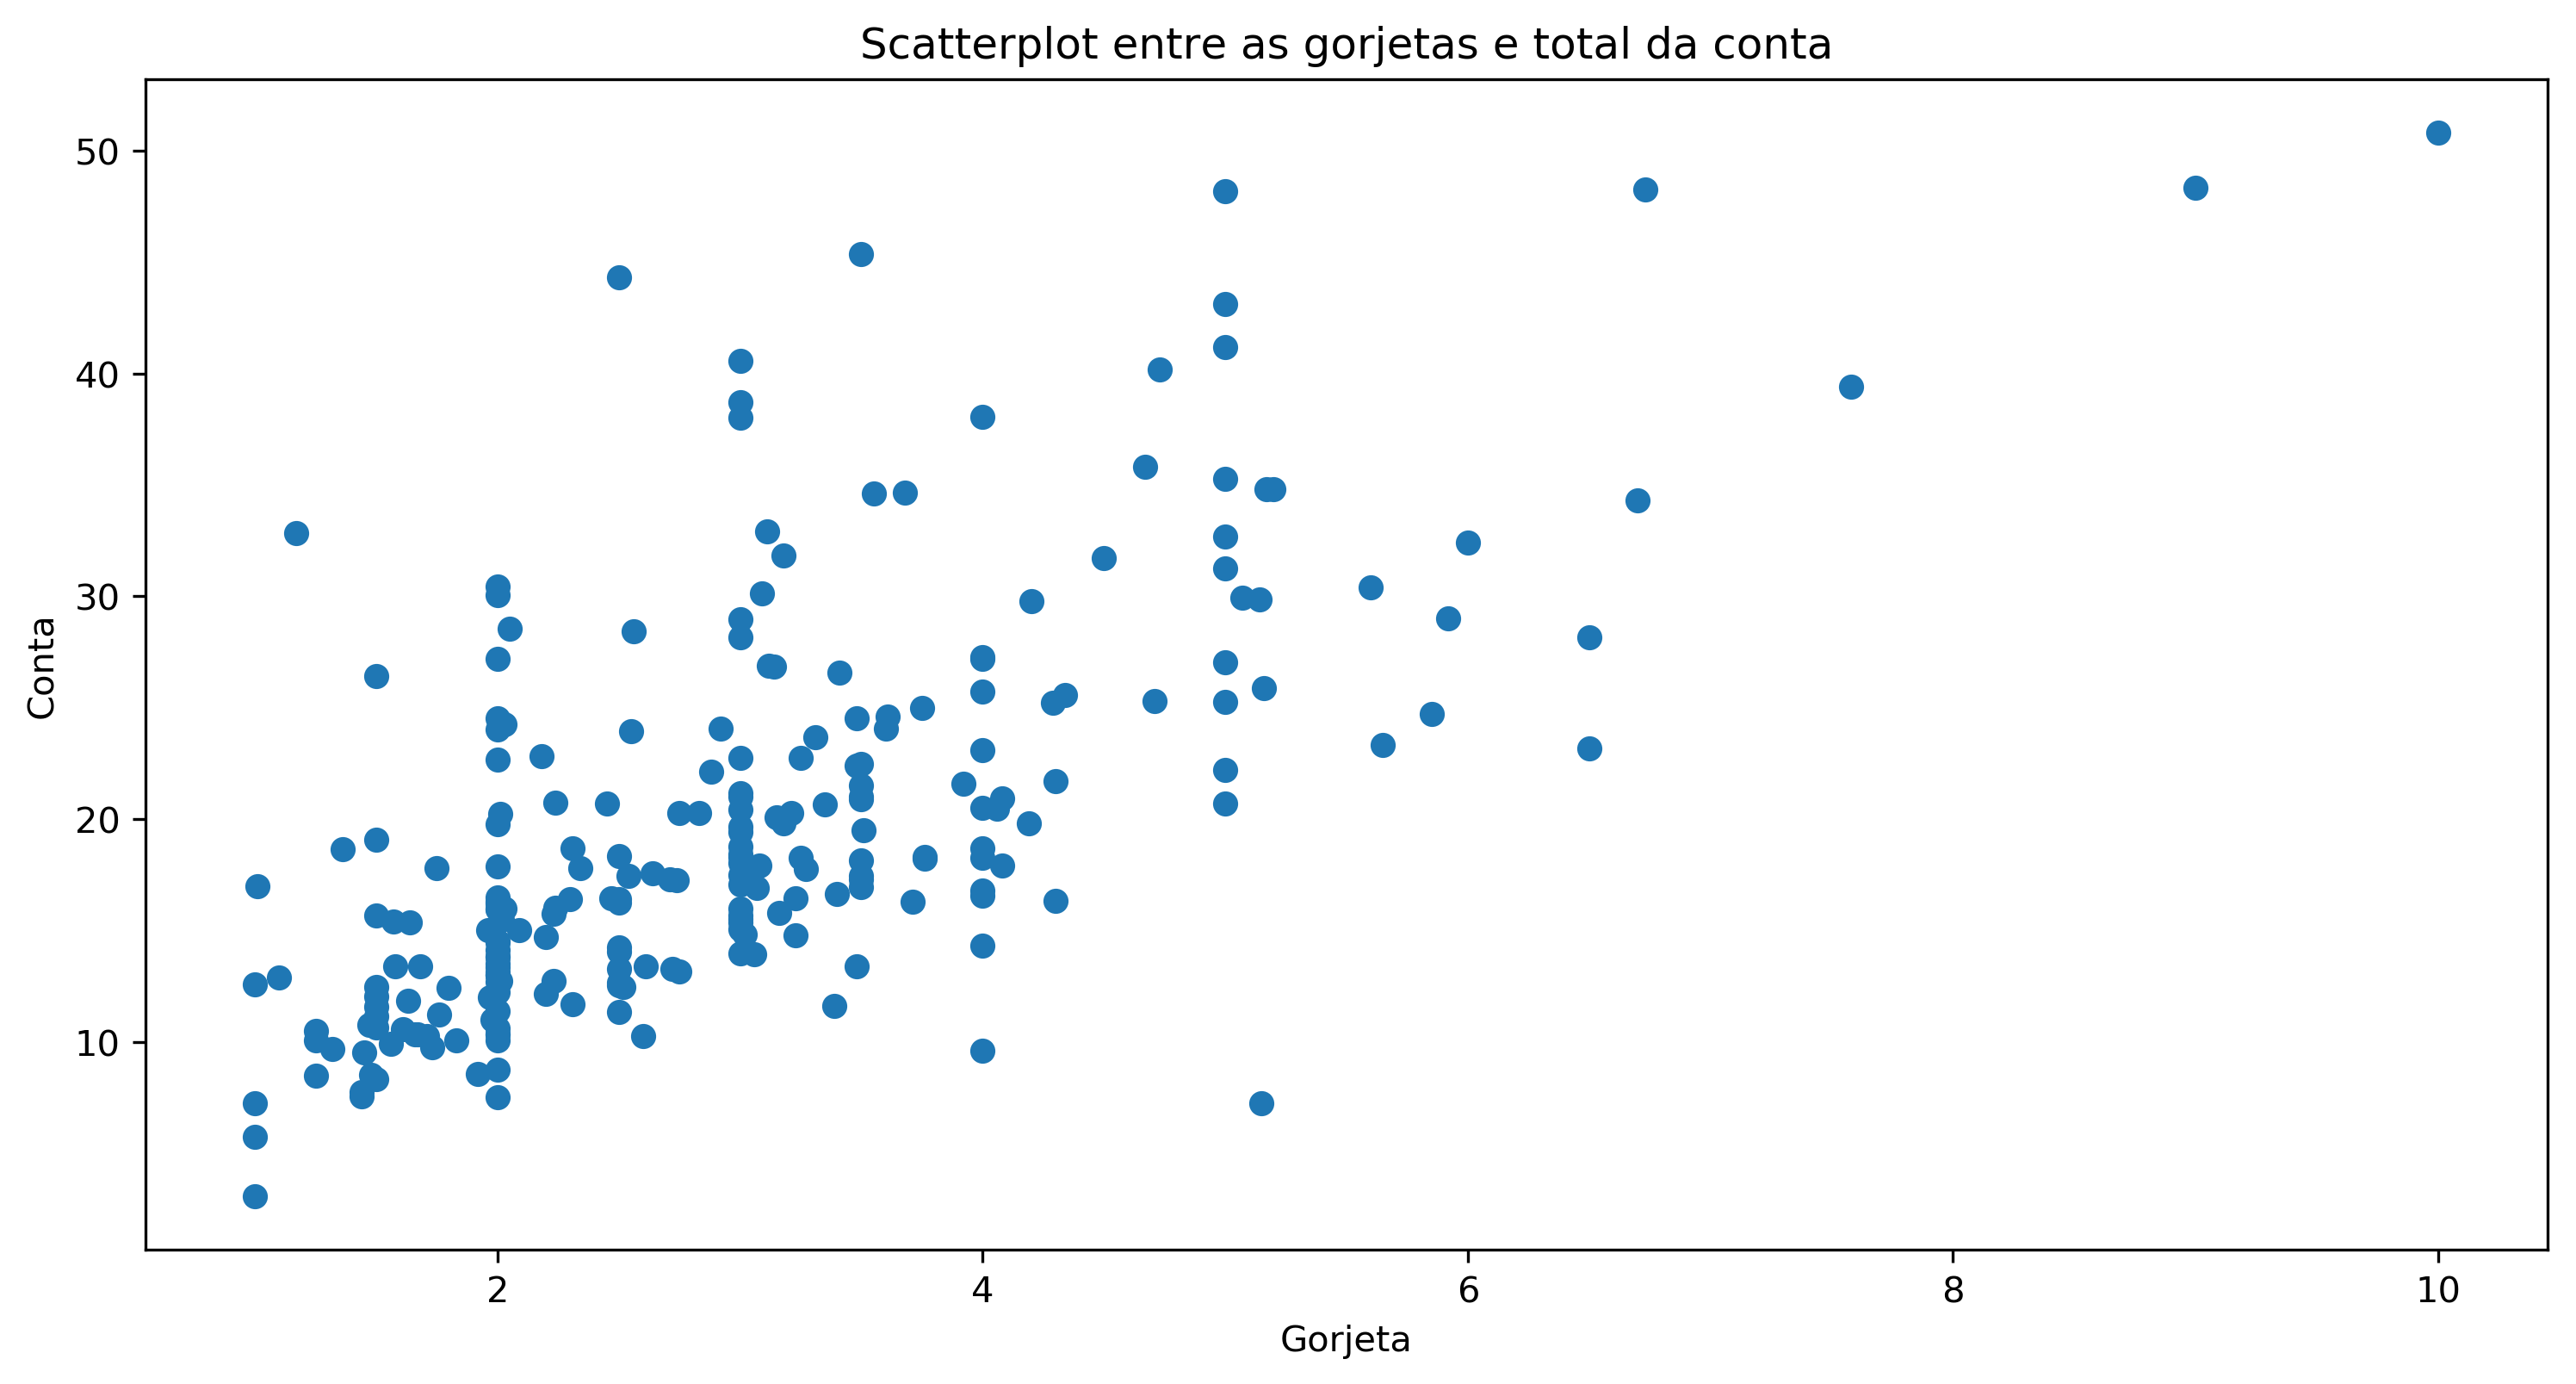

In [22]:
plt.figure(figsize=(12,6), dpi=300)

plt.title('Scatterplot entre as gorjetas e total da conta')

plt.scatter(tips['tip'],tips['total_bill']) 
#na verdade só precisava dessa linha acima, mas quis mostrar as possibilidades.

plt.xlabel('Gorjeta')

plt.ylabel('Conta')

No exemplo acima usamos apenas matplotlib, mas podemos combinar comandos matplotlib com Seaborn, como fizemos antes.

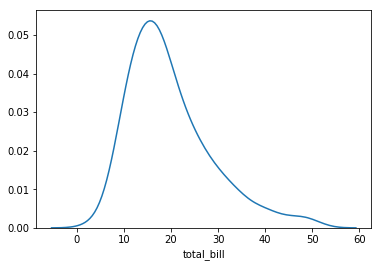

In [23]:
sns.distplot(tips['total_bill'], hist=False)

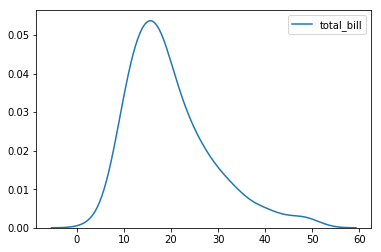

In [24]:
sns.kdeplot(tips['total_bill'])

**Note que os dois acima são equivalentes. Mostrando a curva KDE (Kernel Density Estimation)**

#### Pairplots fazem distplots de cada coluna por cada coluna (apenas colunas numéricas). Podemos especificar o tipo de plots através de argumentos.

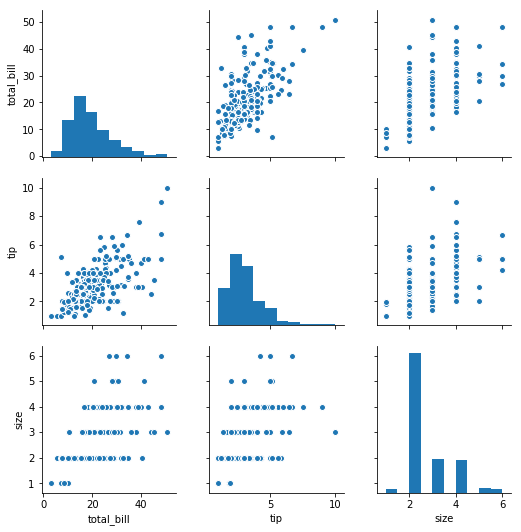

In [29]:
sns.pairplot(tips)

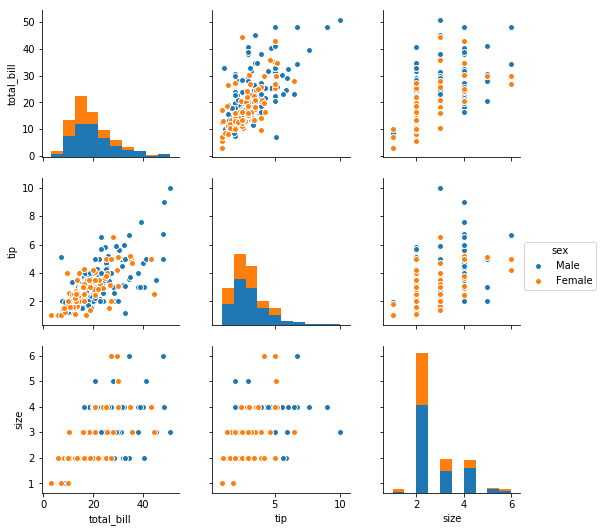

In [34]:
sns.pairplot(tips, hue='sex')
#hue é uma separação por uma coluna categórica. Vamos ver mais isso em Categorical Plots

## Categorical Plots

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Para plots categóricos, nós escolhemos um eixo para ser de variável categórica e outro de variável numérica.

Geralmente escolhemos o eixo X para ser o eixo da variável categórica.

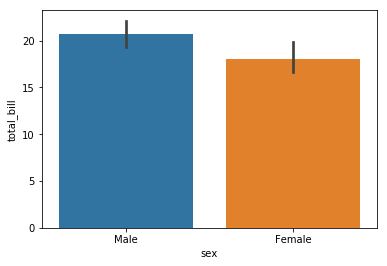

In [40]:
sns.barplot('sex', 'total_bill', data=tips)
#Por padrão é utilizada a média para o eixo com a variável numérica.

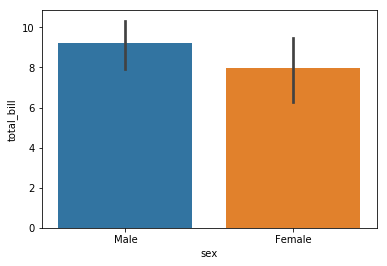

In [37]:
import numpy as np

sns.barplot('sex','total_bill',data=tips,estimator=np.std)
#mudando a função utilizada pelo desvio padrão.

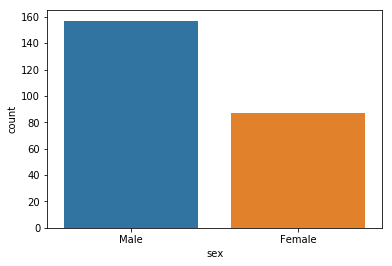

In [45]:
#Se quisermos que a função seja de contagem, podemos usar um countplot, que é um barplot com a função de contagem
sns.countplot('sex',data=tips)
#Para o caso do countplot, não podemos passar ao mesmo tempo valores para x e y, porque um deles vai ser o count.

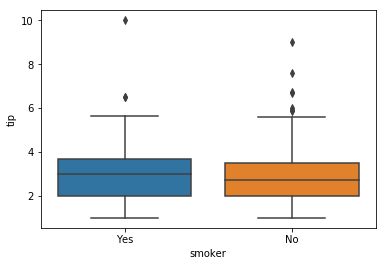

In [47]:
sns.boxplot('smoker','tip', data=tips)

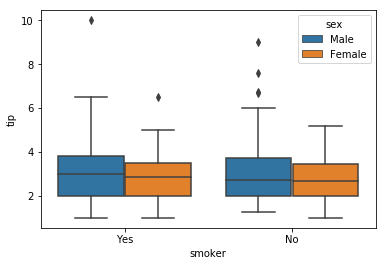

In [48]:
sns.boxplot('smoker','tip',hue='sex', data=tips)

## Existem vários outros plots interessantes, mas que não são "comuns", como o violin plot, strip plot e swarm plot.

Vou mostrar apenas o violin plot, extremamente útil, mas que não é muito popular portanto não adianta mostrar um violin plot numa reunião e esperar que todos entendam.

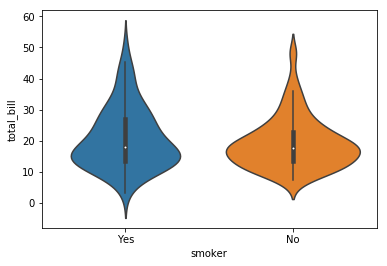

In [50]:
sns.violinplot(x='smoker',y='total_bill', data=tips)

Violin plots mostram o KDE da distribuição dos valores da variável numérica na base de dados. São box plots com muito mais informação.

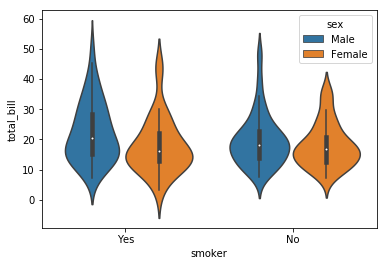

In [51]:
sns.violinplot(x='smoker', y='total_bill', data=tips, hue='sex')

Essencialmente o violin plot espelha o KDE em cada lado. Então, para esses casos em que especificamos uma segunda variável categórica como o 'sex' em "hue='sex'", podemos utilizar um recurso chamado de **split**

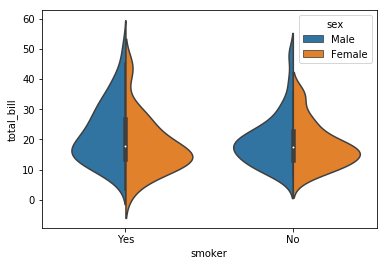

In [52]:
sns.violinplot(x='smoker', y='total_bill', data=tips, hue='sex', split=True)